<br><font color='darkviolet' size=8><u>Monte Carlo Simulations</u></font></br>

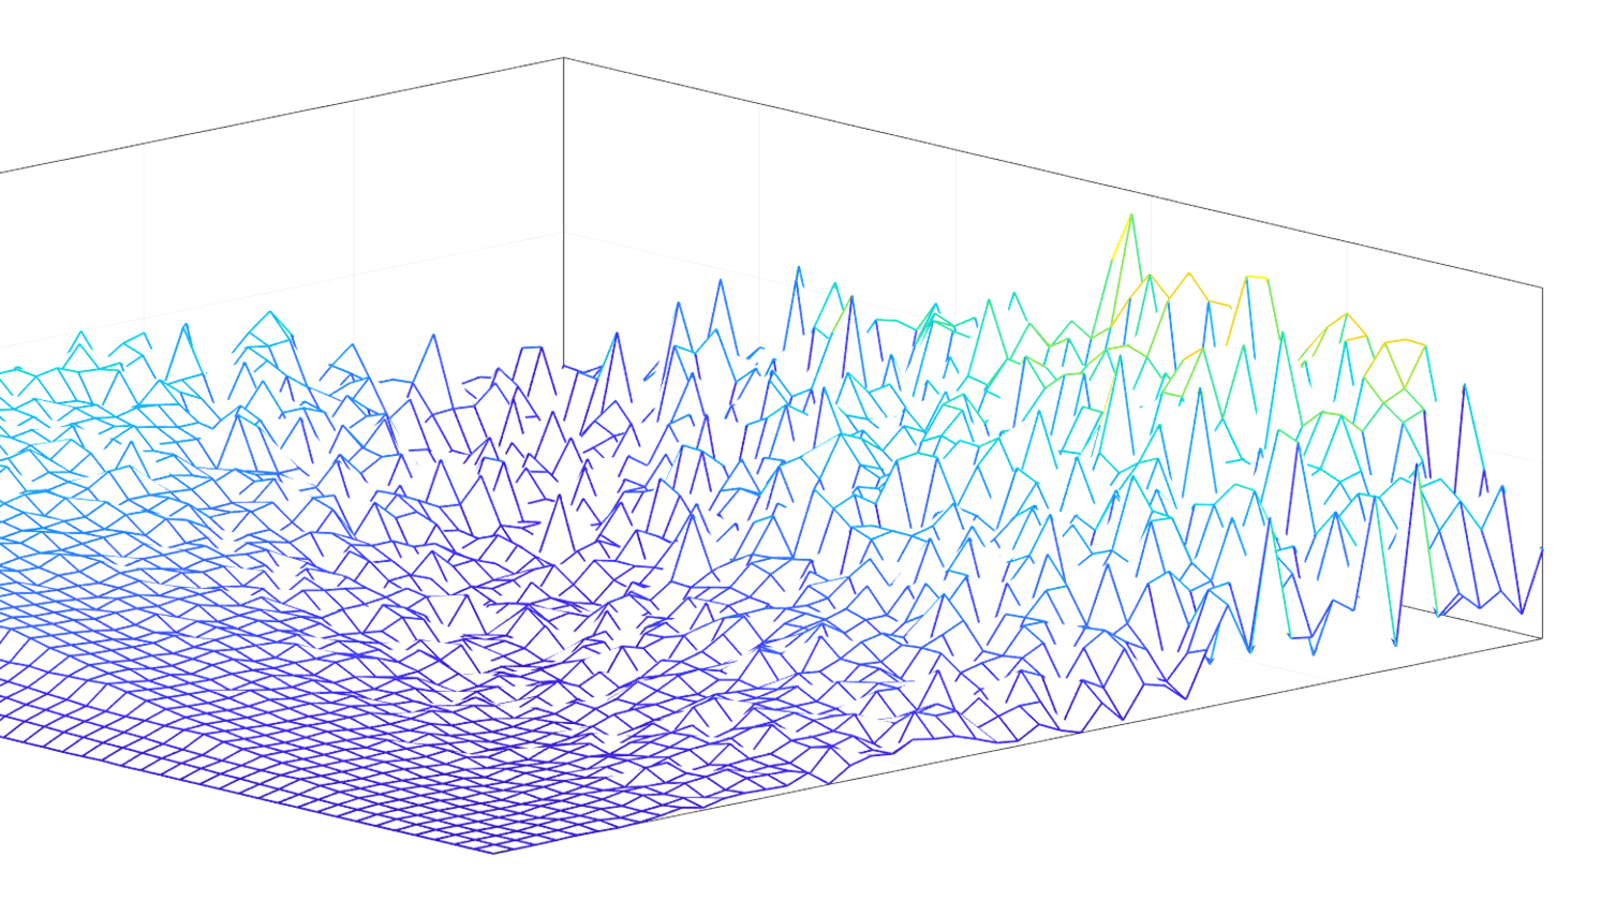

<b>Consider a scenario where you're expected to solve a very tricky probability problem but you don't know how to solve it or another scenario where the probability problem requires a specific domain knowledge in which you're not an expert. <font color='darkviolet'>Monte Carlo Simulation</font> will come to your rescue in such scenarios, it is a method in which we simulate the random experiment using computational algorithms. It is usually a much simpler method to find the required probability compared to the theoretical (or mathematical) methods, however it is not as accurate as the mathematical method and it can be slow & computationally expensive.

# Lets understand <font color='darkviolet'>Monte Carlo Simulation</font> using examples!<br>
Lets start with one of the simplest and most commonly sited example of <font color='darkviolet'>Monte Carlo Simulation</font> and once we get a hang of it. We'll solve a tricky problem using the same technique.<br><br>
    
<font color='blue' size=8><u>Dart Board Problem</u></font><br><br>
First of all, it is not a dart board in literal sense, but something similar to it. Not just this problem, we're going to solve every problem in this notebook using <font color='green'>mathematical method</font> first and then using <font color='darkviolet'>Monte Carlo Simulation</font>, only then we'll be able to truly appreciate the fact that <font color='darkviolet'>Monte Carlo Simulation</font> is much simpler than the <font color='green'>mathematical method</font>. Let me reiterate, it is a trade-off, we're trading accuracy for simplicity.
    
# <font color='blue'>Problem Statement:</font>
Given a unit circle centred at origin and a square which circumscribes this unit circle. Find the probability that a dart that was randomly thrown at the square lands on the circle.
    
# <font color='blue'>Mathematical Solution:</font>

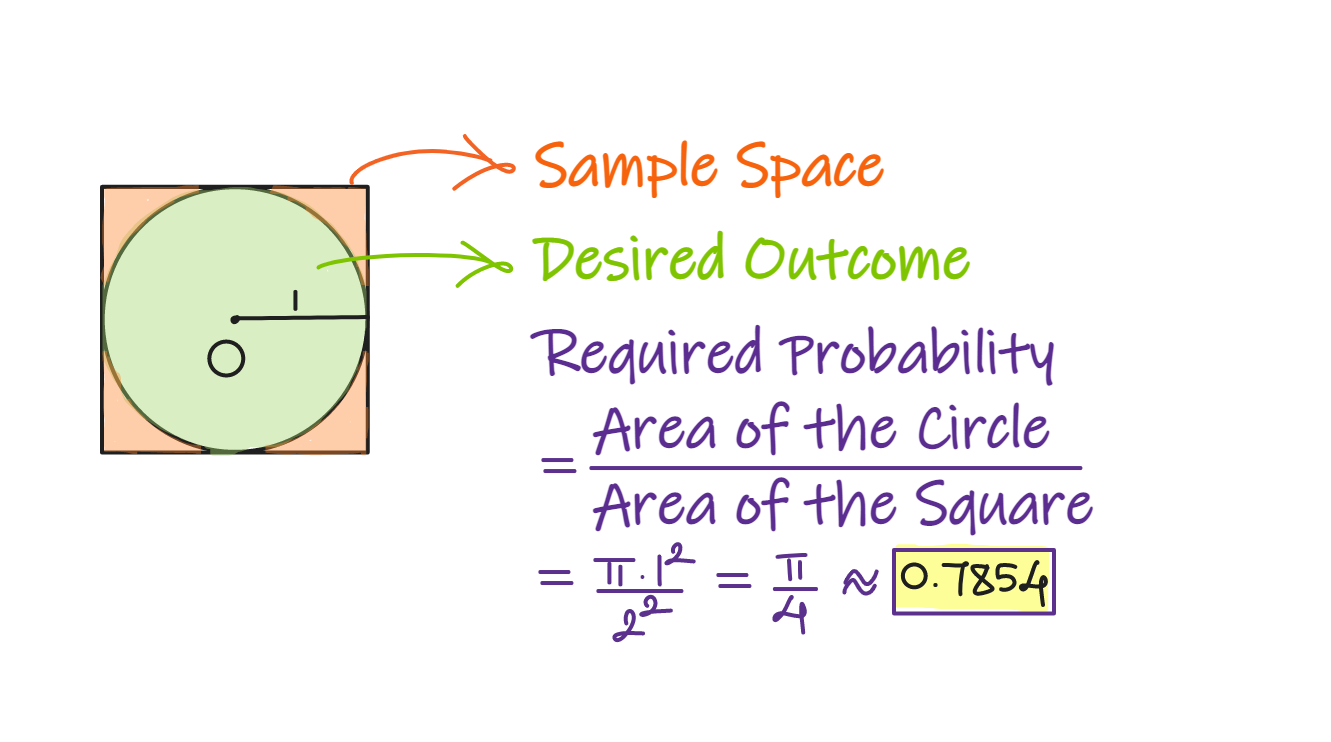

<b>The above mathematical solution is quite simple if you knew how to find probabilities using areas. Let us see how to solve the same problem using Monte Carlo method. It might look like overkill to solve such a simple problem using Monte Carlo but the objective here is to understand the Monte Carlo Simulation so that we can use it on a much more complex problem.

# <font color='blue'>Monte Carlo Solution:</font>

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating a function that finds the probability for the given event with n samples
def dart_board(n,graph=False):
    
    circle=0 # number of points inside the unit circle centred at origin
    # creating n datapoints in a square of side 2 units centred at origin
    # x & y are the coordinates which are chosen from [-1,1] uniform distribution
    
    x=np.random.uniform(-1,1,n)
    y=np.random.uniform(-1,1,n)
    hue=[1]*n # to differentiate between the points inside and outside the circle
    for i in range(n): # iterating over all the above n points
        # check if the above point (x,y) lies inside the unit circle centred at origin
        if x[i]**2+y[i]**2<=1: # equation of circle
            circle+=1
            hue[i]=0
    probability=circle/n # probability of the dart landing inside the circle
    # visualization of the whole setup 
    if graph:
        plt.figure(dpi=300, figsize=(4,4))
        sns.scatterplot(x=x,y=y,hue=hue,palette='Set2',alpha=0.1, edgecolor=None)
        plt.xlim(-1.1,1.1)
        plt.ylim(-1.1,1.1)
        plt.legend().remove()
    
    return probability

0.785188

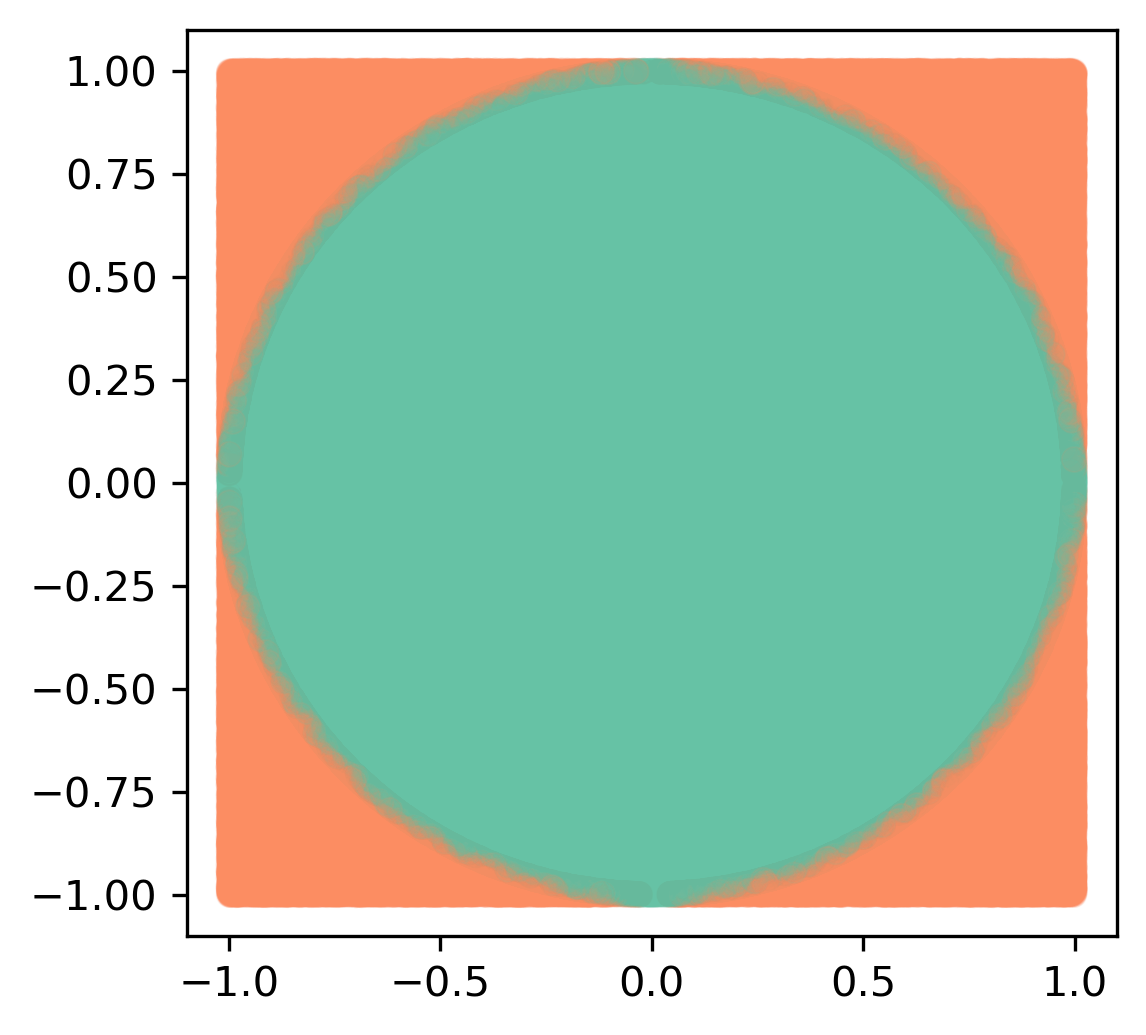

In [3]:
# choosing arbitrarily high value to attain better approximation
dart_proba=dart_board(10**6, graph=True)
dart_proba

<b>As you can clearly see that the answer obtained using <font color='darkviolet'>Monte Carlo Solution</font> which is <font color='darkviolet'>0.785188</font> is so very close to the actual mathematical solution. Lets see in the following graph how the accuracy of the <font color='darkviolet'>Monte Carlo Solution</font> increases as the number of samples increases.</b>

In [4]:
monte_proba=[] # to collect probabilities for different number of samples
for i in range(25):
    monte_proba.append(dart_board(2**i)) # calculating the probabilities and appending it

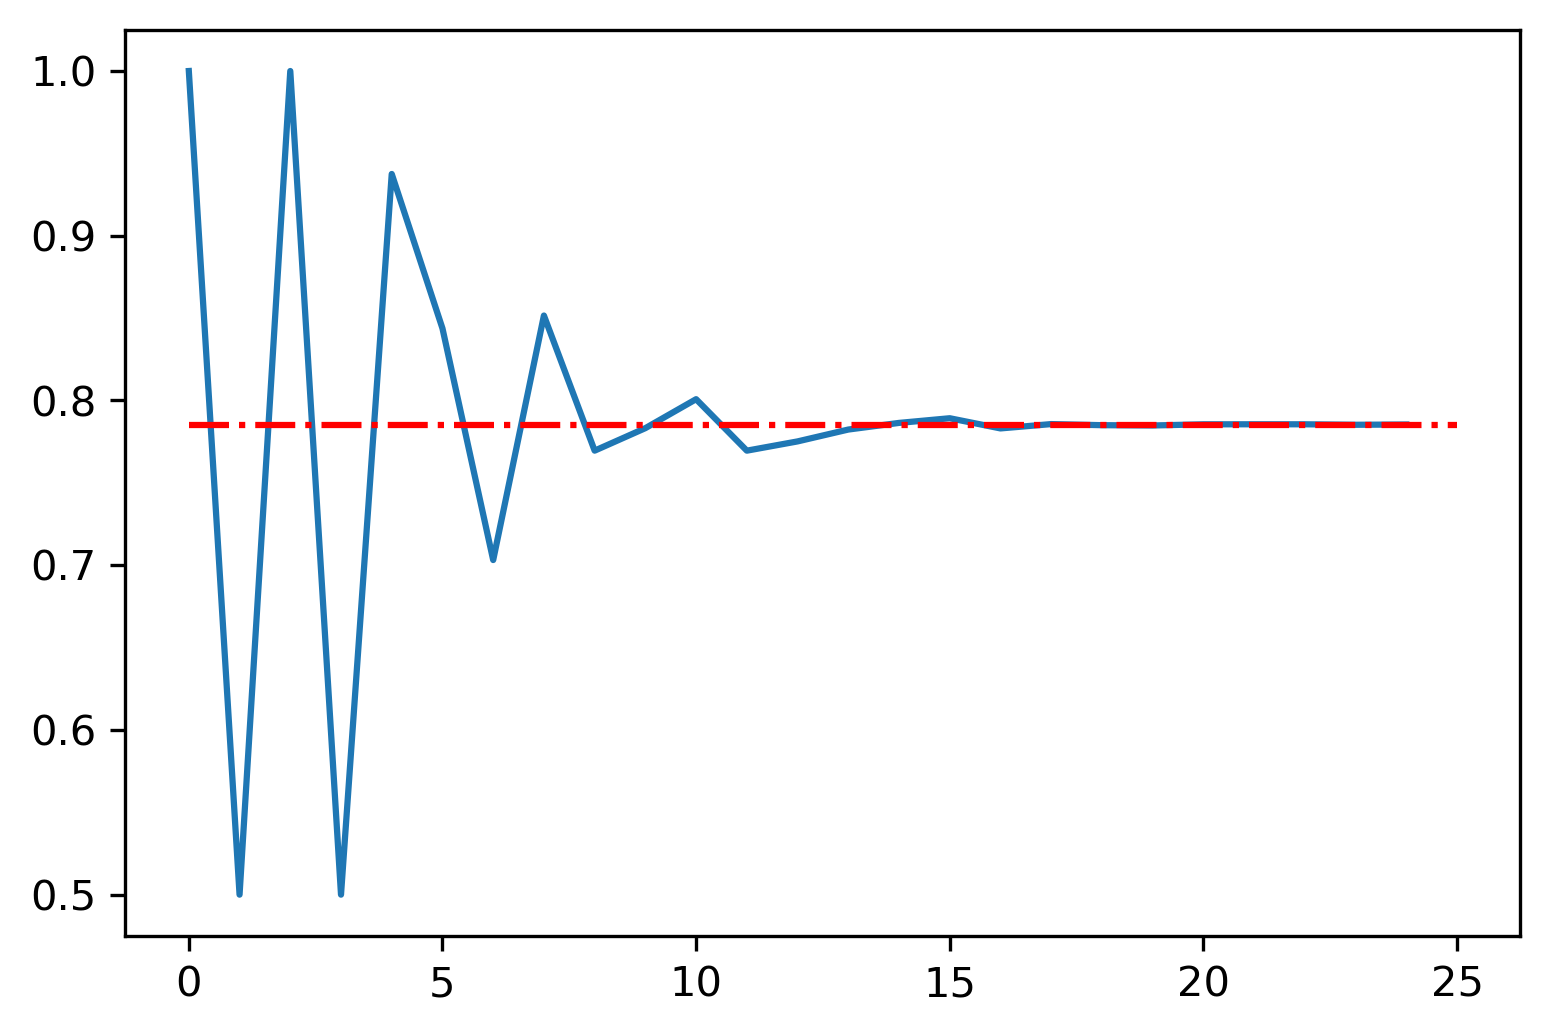

In [5]:
# x-axis is in logarithmic scale
plt.figure(dpi=300)
sns.lineplot(x=range(25),y=monte_proba)
sns.lineplot(x=[0,25],y=[dart_proba]*2,color='Red',alpha=1,ls='-.'); # theoretical value

<b>In the above graph, we can see how the <font color='darkviolet'>Monte Carlo Solution</font> converges to the actual theoretical probability.<br><br>

<hr><br>
<font color='green' size=8><u>Broken Stick Problem</u></font><br>
    
# <font color='green'>Problem Statement:</font>
If a stick is broken into three pieces, what is the probability that the three pieces can be used to construct a triangle?</b>
    
# <font color='green'>Mathematical Solution:</font>

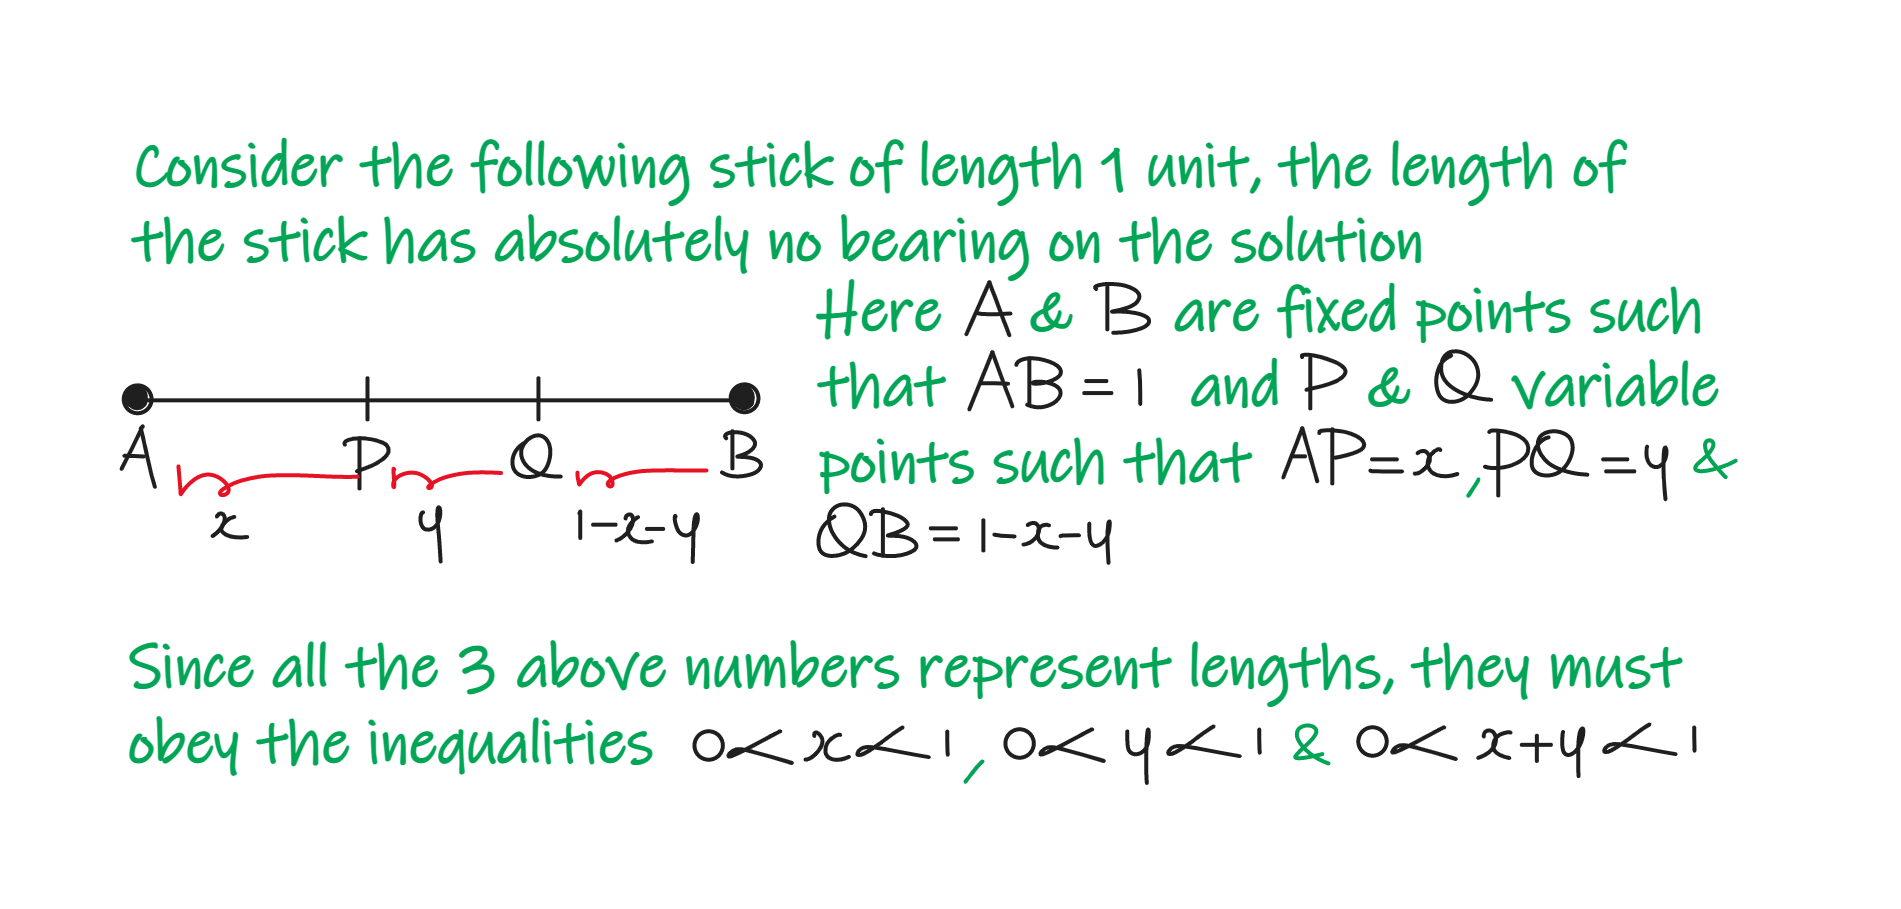

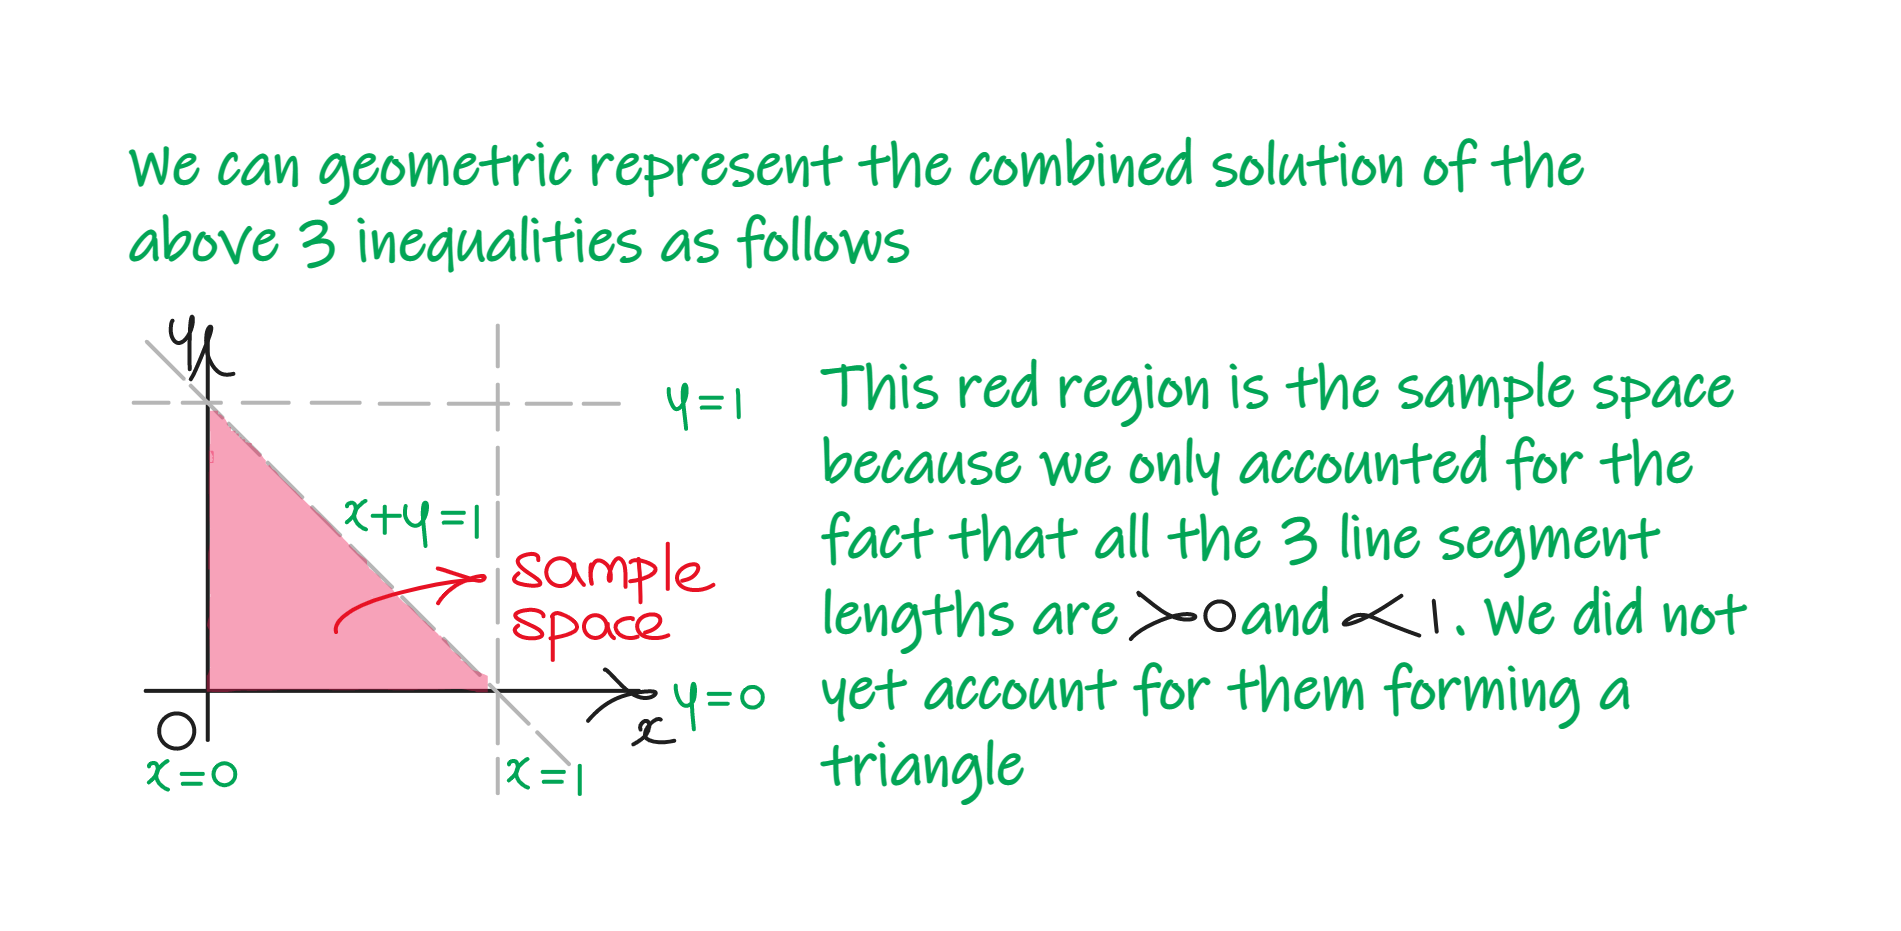

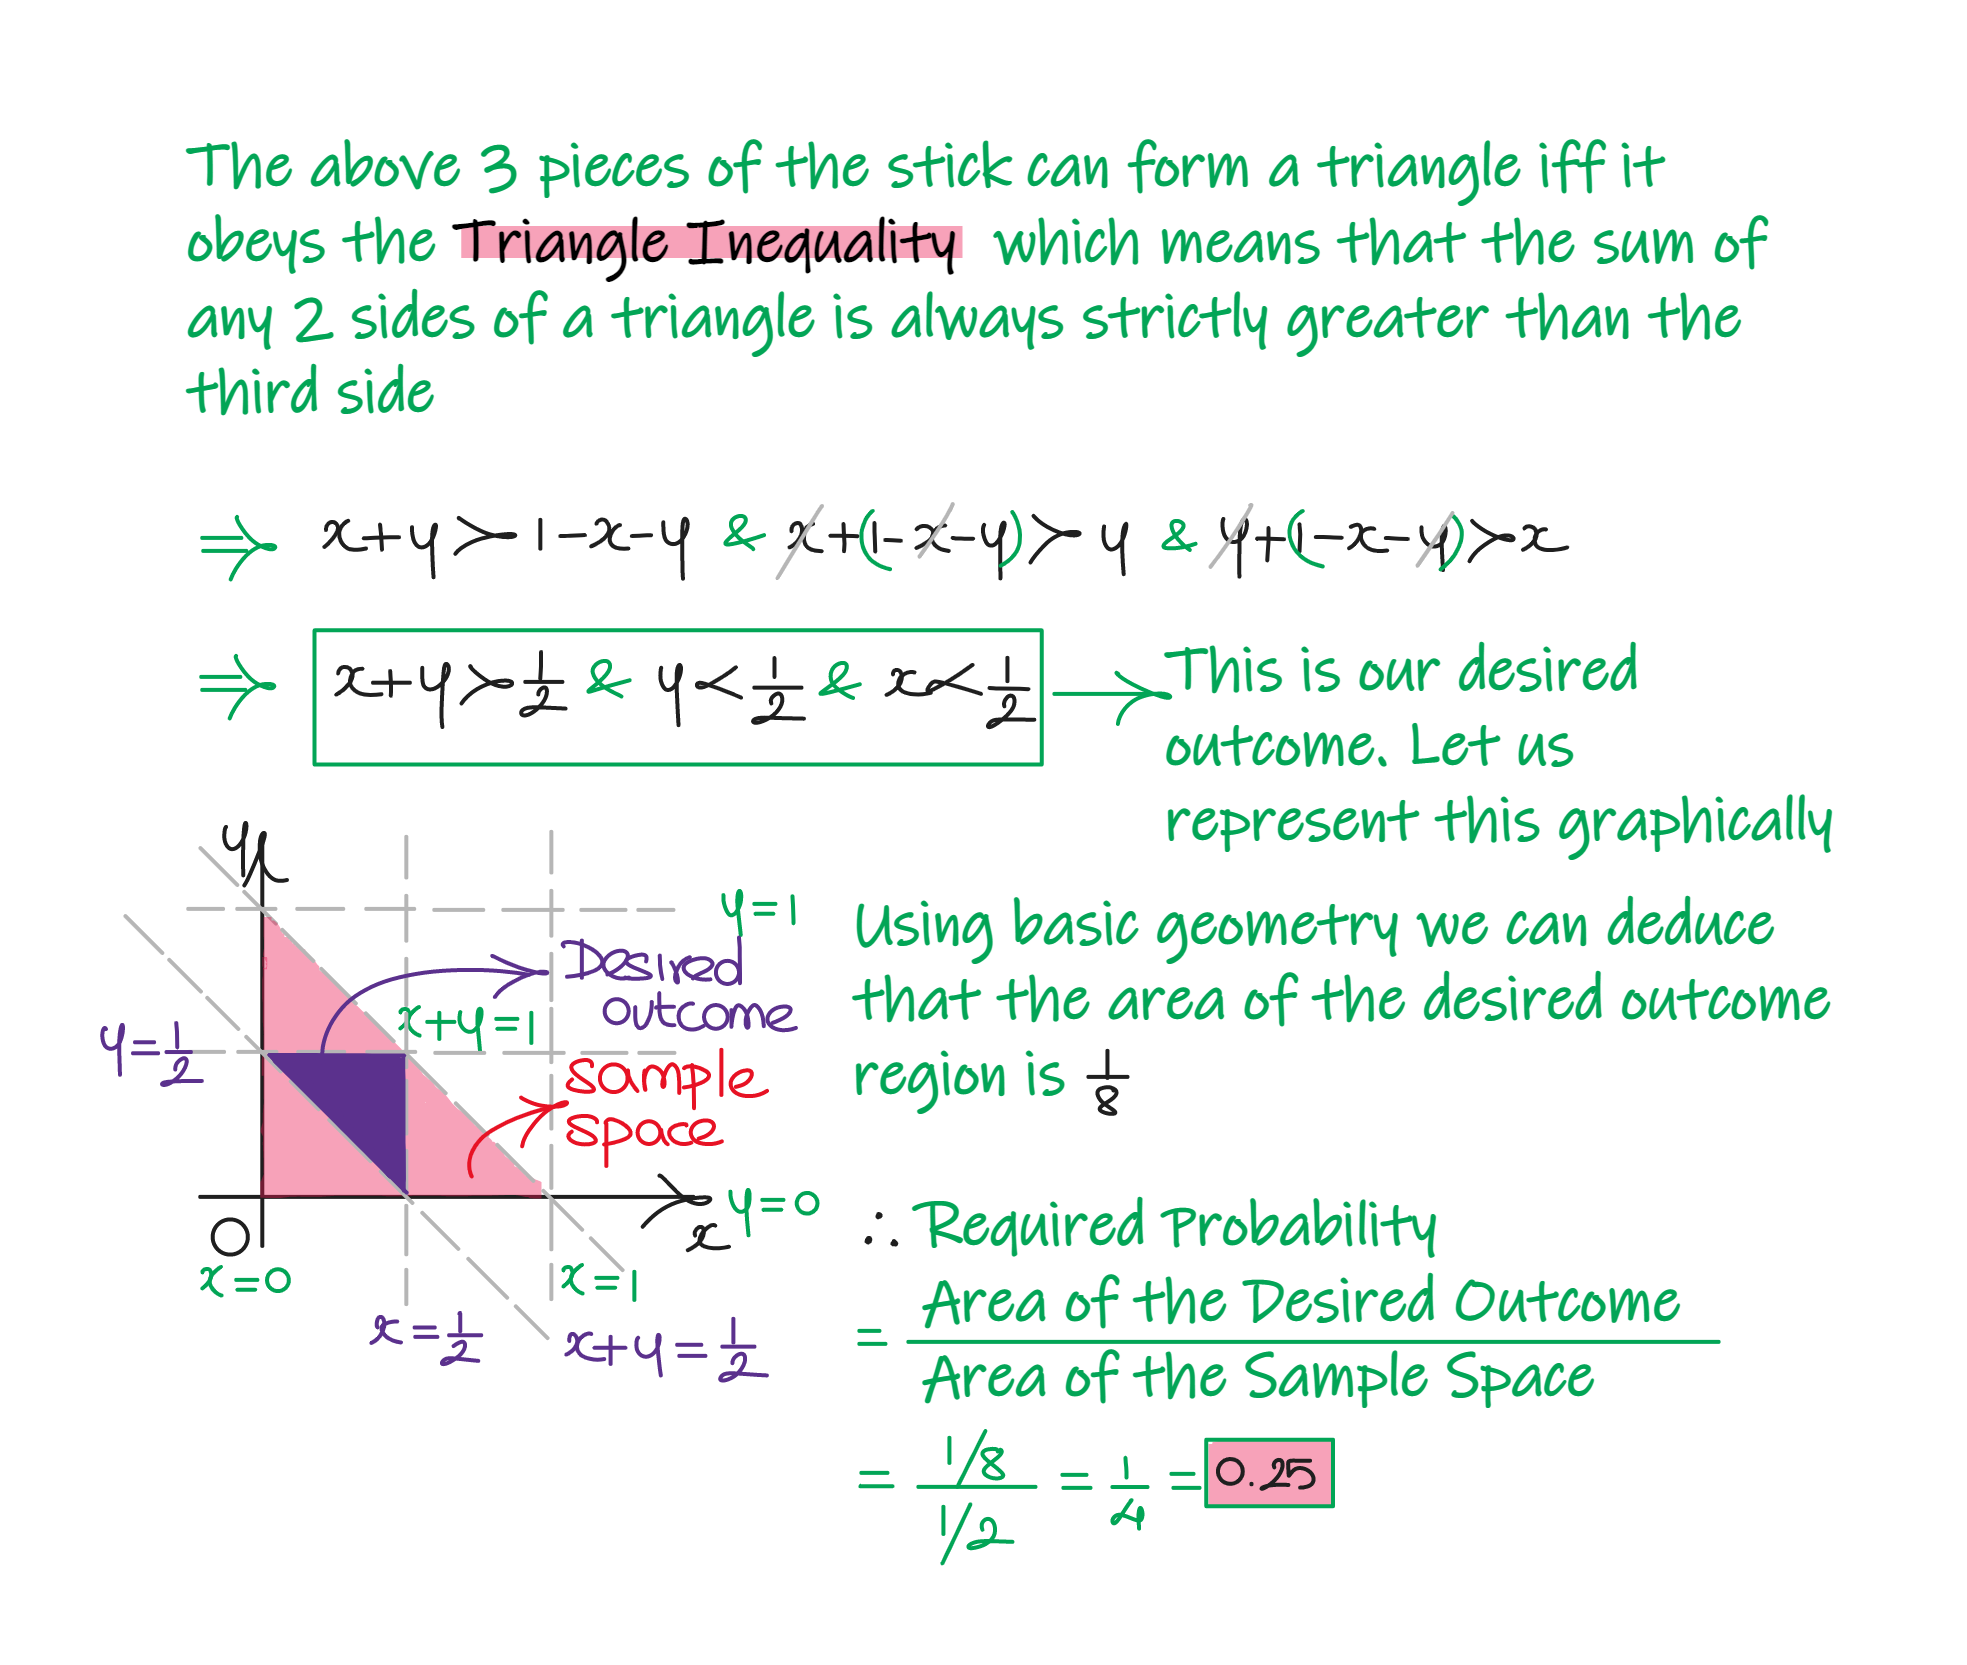

<br><b>The above mathematical solution is quite tricky. Let us see how to solve the same problem using Monte Carlo method.</b><br><br>


# <font color='Green'>Monte Carlo Solution:</font>

In [6]:
# creating a function that finds the probability for the given event with n samples
def broken_stick(n,graph=False):
    
    triangle=0 # number of triangles formed
    
    sample_space=0 # number of points in sample space
    
    # x & y are the coordinates which are chosen from [-1,1] uniform distribution
    
    x=np.random.uniform(0,1,n)
    y=np.random.uniform(0,1,n)
    
    sample_points=[] # to collect the sample points
    
    hue=[] # to differentiate between the points inside and outside the desired region
        
    for i in range(n): # iterating over all the above n points
        
        # check if the above point (x,y) lies inside the sample space 
        
        if x[i]>0 and y[i]>0 and x[i]+y[i]<1:
            sample_space+=1
            hue.append(0)
            sample_points.append([x[i],y[i]]) # collecting sample points
            
            # check the formation of triangle
            
            if x[i]<0.5 and y[i]<0.5 and x[i]+y[i]>0.5: # triangle inequality
                triangle+=1
                hue[-1]=1
    
    sample_points=np.array(sample_points)
    
    probability=triangle/sample_space # this is the required probability of forming the triangle 
    
    # visualization of the whole setup when graph parameter in turned on
    if graph:
        plt.figure(dpi=300, figsize=(4,4))
        sns.scatterplot(x=sample_points[:,0],y=sample_points[:,1],hue=hue,palette=['pink','purple'],alpha=0.1, edgecolor=None)
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.legend().remove()
    
    return probability

0.24987464816586794

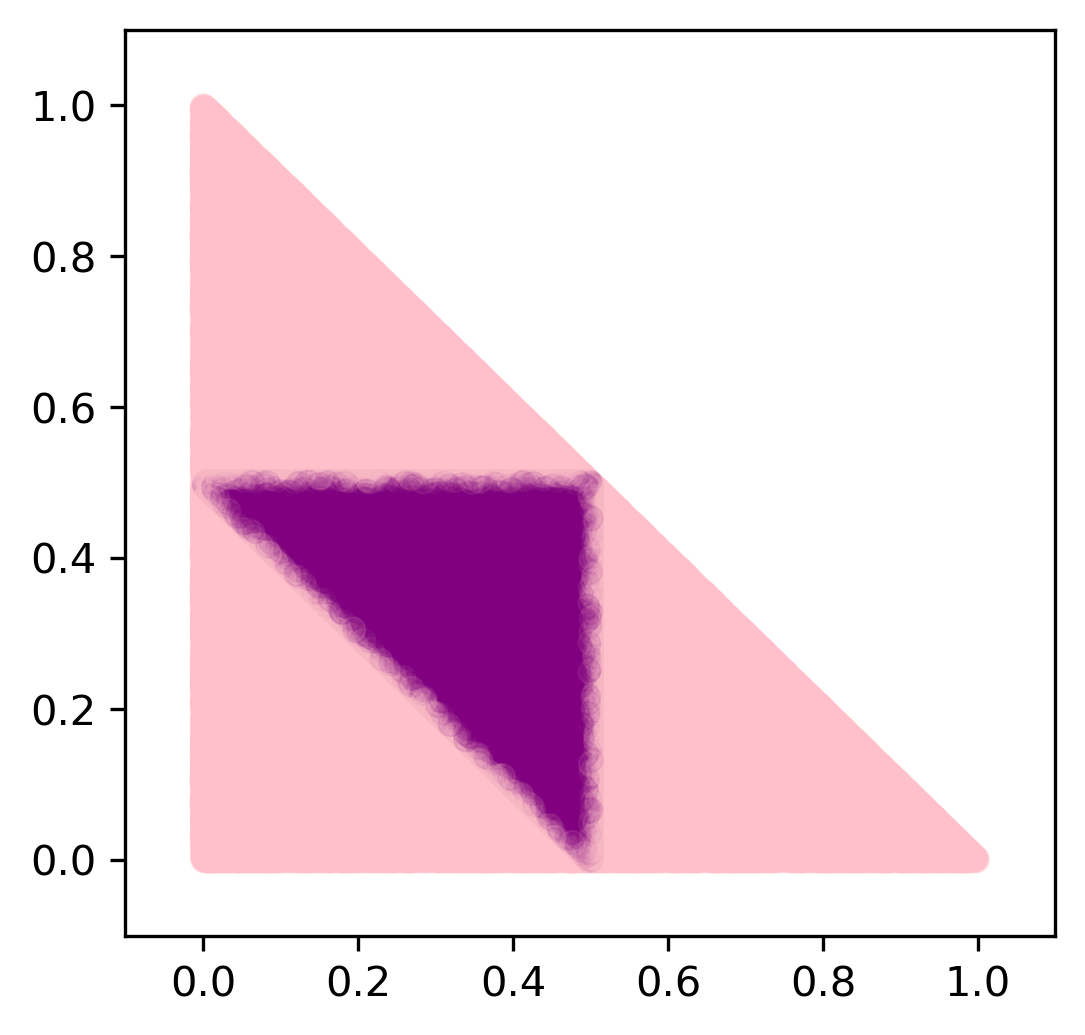

In [7]:
# choosing arbitrarily high value to attain better approximation
broken_proba=broken_stick(10**6,graph=True)
broken_proba

<b>As you can clearly see that the answer obtained using <font color='darkviolet'>Monte Carlo Solution</font> which is <font color='darkviolet'>0.2499</font> is so very close to the actual mathematical solution. Lets see in the following graph how the accuracy of the <font color='darkviolet'>Monte Carlo Solution</font> increases as the number of samples increases.</b>

In [8]:
monte_proba=[] # to collect probabilities for different number of samples
for i in range(1,25):
    monte_proba.append(broken_stick(2**i)) # calculating the probabilities and appending it

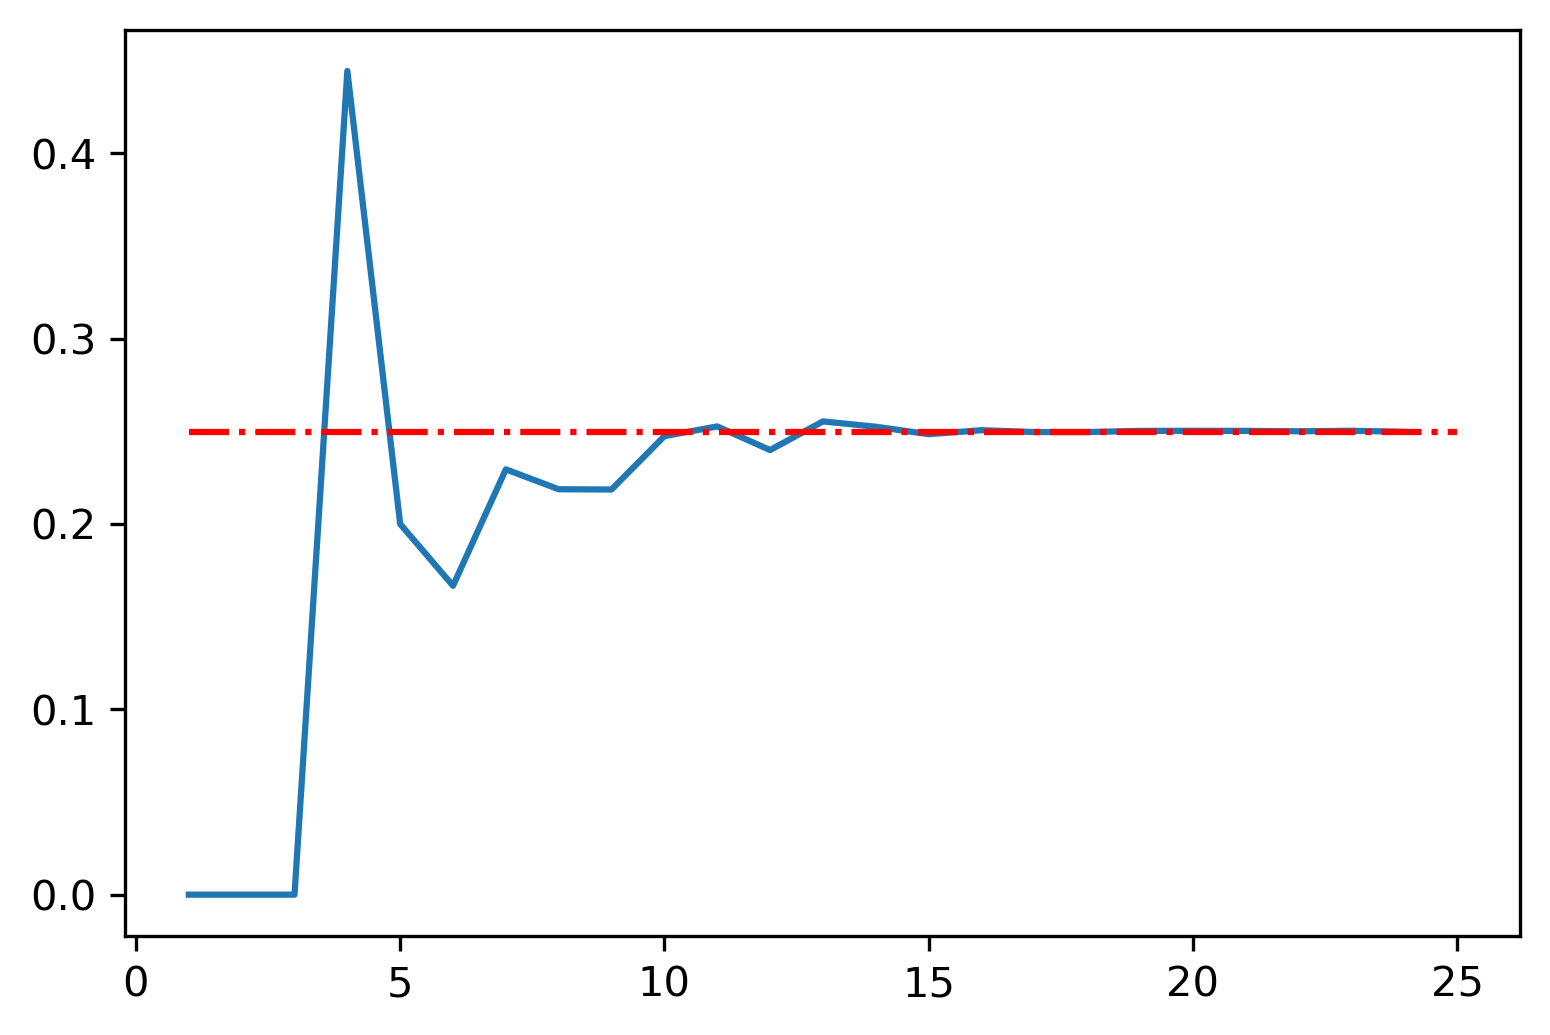

In [9]:
# x-axis is in logarithmic scale
plt.figure(dpi=300)
sns.lineplot(x=range(1,25),y=monte_proba)
sns.lineplot(x=[1,25],y=[broken_proba]*2,color='Red',alpha=1,ls='-.'); # theoretical value

<b>In the above graph, we can see how the <font color='darkviolet'>Monte Carlo Solution</font> converges to the actual theoretical probability.
<hr>
